In [1]:
# Import libraries..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import datasets

rev_train = pd.read_csv("train.tsv", sep = '\t')
rev_test = pd.read_csv("test.tsv", sep = '\t')

In [3]:
rev_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
rev_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [5]:
# concat both the train and test for processing.

reviews_train = list(rev_train['Phrase'])
reviews_test = list(rev_test['Phrase'])

In [6]:
reviews = reviews_train+reviews_test
reviews

['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
 'A series of escapades demonstrating the adage that what is good for the goose',
 'A series',
 'A',
 'series',
 'of escapades demonstrating the adage that what is good for the goose',
 'of',
 'escapades demonstrating the adage that what is good for the goose',
 'escapades',
 'demonstrating the adage that what is good for the goose',
 'demonstrating the adage',
 'demonstrating',
 'the adage',
 'the',
 'adage',
 'that what is good for the goose',
 'that',
 'what is good for the goose',
 'what',
 'is good for the goose',
 'is',
 'good for the goose',
 'good',
 'for the goose',
 'for',
 'the goose',
 'goose',
 'is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
 'is also good for the gander , some of which occasionally amuses but none of 

In [7]:
from processing import TextCleaner

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
tc = TextCleaner.TextCleaner(text = reviews, text_form = 'List', stemming = False, lemmat = True)
text_clean = tc.clean()

In [9]:
text_clean

['series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story',
 'series escapade demonstrating adage good goose',
 'series',
 '',
 'series',
 'escapade demonstrating adage good goose',
 '',
 'escapade demonstrating adage good goose',
 'escapade',
 'demonstrating adage good goose',
 'demonstrating adage',
 'demonstrating',
 'adage',
 '',
 'adage',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 'good',
 'goose',
 '',
 'goose',
 'goose',
 'also good gander occasionally amuses none amount much story',
 'also good gander occasionally amuses none amount much story',
 'also',
 'also',
 'good gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander',
 'gander',
 'gander',
 '',
 'occasionally amuses none amount much story',
 '',
 '',
 '',
 '',
 'occasionally amuses none amount much story',
 'occasionally',
 '

In [10]:
len(text_clean)

222352

In [11]:
#vocabulary

join_text = ' '.join(text_clean)
vocab = set(join_text.split())
vocab.add('<PAD>')
vocab.add('<UNK>')
vocab = sorted(list(vocab))
vocab

['!',
 '<PAD>',
 '<UNK>',
 'aaa',
 'aaliyah',
 'aan',
 'abagnale',
 'abandon',
 'abandoned',
 'abbas',
 'abbass',
 'abbott',
 'abbreviated',
 'abc',
 'abderrahmane',
 'abdul',
 'abel',
 'aberration',
 'abhorrent',
 'abhors',
 'abiding',
 'ability',
 'abject',
 'able',
 'ably',
 'abomination',
 'aborbing',
 'aboriginal',
 'abornin',
 'aborted',
 'aboul',
 'abound',
 'aboveaverage',
 'abrams',
 'abrasive',
 'abridged',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'abstract',
 'absurd',
 'absurdist',
 'absurdity',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'abuser',
 'abysmal',
 'abysmally',
 'abyss',
 'ac',
 'academic',
 'academy',
 'accelerated',
 'accent',
 'accentuating',
 'accept',
 'acceptable',
 'acceptance',
 'accepting',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'accidentprone',
 'acclaim',
 'acclaimed',
 'accommo

In [12]:
vocab.remove('!')
vocab

['<PAD>',
 '<UNK>',
 'aaa',
 'aaliyah',
 'aan',
 'abagnale',
 'abandon',
 'abandoned',
 'abbas',
 'abbass',
 'abbott',
 'abbreviated',
 'abc',
 'abderrahmane',
 'abdul',
 'abel',
 'aberration',
 'abhorrent',
 'abhors',
 'abiding',
 'ability',
 'abject',
 'able',
 'ably',
 'abomination',
 'aborbing',
 'aboriginal',
 'abornin',
 'aborted',
 'aboul',
 'abound',
 'aboveaverage',
 'abrams',
 'abrasive',
 'abridged',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'abstract',
 'absurd',
 'absurdist',
 'absurdity',
 'absurdly',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abused',
 'abuser',
 'abysmal',
 'abysmally',
 'abyss',
 'ac',
 'academic',
 'academy',
 'accelerated',
 'accent',
 'accentuating',
 'accept',
 'acceptable',
 'acceptance',
 'accepting',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accident',
 'accidental',
 'accidentprone',
 'acclaim',
 'acclaimed',
 'accommodate',

In [13]:
len(vocab)    #unique words

17298

In [14]:
# assign each words of vocabulary in index

word_to_index = {word:i for i, word in enumerate(vocab)}

#similarly, assign in index form so that we can verify later 

index_to_word = {i:word for i, word in enumerate(vocab)}

In [15]:
word_to_index

{'<PAD>': 0,
 '<UNK>': 1,
 'aaa': 2,
 'aaliyah': 3,
 'aan': 4,
 'abagnale': 5,
 'abandon': 6,
 'abandoned': 7,
 'abbas': 8,
 'abbass': 9,
 'abbott': 10,
 'abbreviated': 11,
 'abc': 12,
 'abderrahmane': 13,
 'abdul': 14,
 'abel': 15,
 'aberration': 16,
 'abhorrent': 17,
 'abhors': 18,
 'abiding': 19,
 'ability': 20,
 'abject': 21,
 'able': 22,
 'ably': 23,
 'abomination': 24,
 'aborbing': 25,
 'aboriginal': 26,
 'abornin': 27,
 'aborted': 28,
 'aboul': 29,
 'abound': 30,
 'aboveaverage': 31,
 'abrams': 32,
 'abrasive': 33,
 'abridged': 34,
 'abroad': 35,
 'abrupt': 36,
 'abruptly': 37,
 'absence': 38,
 'absent': 39,
 'absolute': 40,
 'absolutely': 41,
 'absorb': 42,
 'absorbed': 43,
 'absorbing': 44,
 'absorbs': 45,
 'abstract': 46,
 'absurd': 47,
 'absurdist': 48,
 'absurdity': 49,
 'absurdly': 50,
 'abundance': 51,
 'abundant': 52,
 'abundantly': 53,
 'abuse': 54,
 'abused': 55,
 'abuser': 56,
 'abysmal': 57,
 'abysmally': 58,
 'abyss': 59,
 'ac': 60,
 'academic': 61,
 'academy': 62,


In [16]:
index_to_word

{0: '<PAD>',
 1: '<UNK>',
 2: 'aaa',
 3: 'aaliyah',
 4: 'aan',
 5: 'abagnale',
 6: 'abandon',
 7: 'abandoned',
 8: 'abbas',
 9: 'abbass',
 10: 'abbott',
 11: 'abbreviated',
 12: 'abc',
 13: 'abderrahmane',
 14: 'abdul',
 15: 'abel',
 16: 'aberration',
 17: 'abhorrent',
 18: 'abhors',
 19: 'abiding',
 20: 'ability',
 21: 'abject',
 22: 'able',
 23: 'ably',
 24: 'abomination',
 25: 'aborbing',
 26: 'aboriginal',
 27: 'abornin',
 28: 'aborted',
 29: 'aboul',
 30: 'abound',
 31: 'aboveaverage',
 32: 'abrams',
 33: 'abrasive',
 34: 'abridged',
 35: 'abroad',
 36: 'abrupt',
 37: 'abruptly',
 38: 'absence',
 39: 'absent',
 40: 'absolute',
 41: 'absolutely',
 42: 'absorb',
 43: 'absorbed',
 44: 'absorbing',
 45: 'absorbs',
 46: 'abstract',
 47: 'absurd',
 48: 'absurdist',
 49: 'absurdity',
 50: 'absurdly',
 51: 'abundance',
 52: 'abundant',
 53: 'abundantly',
 54: 'abuse',
 55: 'abused',
 56: 'abuser',
 57: 'abysmal',
 58: 'abysmally',
 59: 'abyss',
 60: 'ac',
 61: 'academic',
 62: 'academy',


In [17]:
# convert the words to index form in each senetence.

In [18]:
sent_to_ix = []
for i in text_clean:
    each_ix = []
    for w in i.split():
        if w not in word_to_index:
            each_ix.append(word_to_index['<UNK>'])
        else:
            each_ix.append(word_to_index[w])
    sent_to_ix.append(each_ix)

In [19]:
sent_to_ix[0]

[13424,
 5133,
 3755,
 168,
 6379,
 6404,
 450,
 6379,
 6115,
 10355,
 526,
 10191,
 515,
 9858,
 14578]

In [20]:
#checking
sent = []          
for s in sent_to_ix[0]:
    sent.append(index_to_word[s])
print(sent)

['series', 'escapade', 'demonstrating', 'adage', 'good', 'goose', 'also', 'good', 'gander', 'occasionally', 'amuses', 'none', 'amount', 'much', 'story']


In [21]:
text_clean[0]

'series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story'

In [22]:
word_to_index['series'],word_to_index['escapade']

(13424, 5133)

In [23]:
sent_to_ix

[[13424,
  5133,
  3755,
  168,
  6379,
  6404,
  450,
  6379,
  6115,
  10355,
  526,
  10191,
  515,
  9858,
  14578],
 [13424, 5133, 3755, 168, 6379, 6404],
 [13424],
 [],
 [13424],
 [5133, 3755, 168, 6379, 6404],
 [],
 [5133, 3755, 168, 6379, 6404],
 [5133],
 [3755, 168, 6379, 6404],
 [3755, 168],
 [3755],
 [168],
 [],
 [168],
 [6379, 6404],
 [],
 [6379, 6404],
 [],
 [6379, 6404],
 [],
 [6379, 6404],
 [6379],
 [6404],
 [],
 [6404],
 [6404],
 [450, 6379, 6115, 10355, 526, 10191, 515, 9858, 14578],
 [450, 6379, 6115, 10355, 526, 10191, 515, 9858, 14578],
 [450],
 [450],
 [6379, 6115, 10355, 526, 10191, 515, 9858, 14578],
 [6115, 10355, 526, 10191, 515, 9858, 14578],
 [6115, 10355, 526, 10191, 515, 9858, 14578],
 [6115],
 [6115],
 [6115],
 [],
 [10355, 526, 10191, 515, 9858, 14578],
 [],
 [],
 [],
 [],
 [10355, 526, 10191, 515, 9858, 14578],
 [10355],
 [526, 10191, 515, 9858, 14578],
 [526],
 [10191, 515, 9858, 14578],
 [],
 [10191, 515, 9858, 14578],
 [10191],
 [515, 9858, 14578],
 [

In [24]:
len(reviews), len(sent_to_ix)

(222352, 222352)

In [25]:
# we have to see the distribution of the review lengths

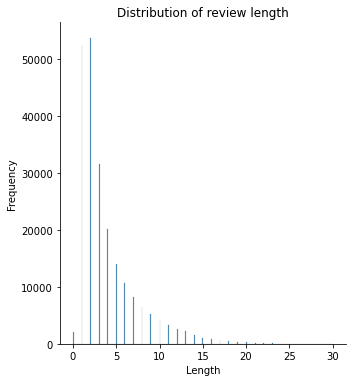

In [26]:
length = []
for l in sent_to_ix:
    length.append(len(l))

import seaborn as sns

sns.displot(length)
plt.title("Distribution of review length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

In [27]:
#seperate the train and test data

train = sent_to_ix[:rev_train.shape[0]]
test = sent_to_ix[rev_train.shape[0]:]

In [28]:
##most of the sentence length <=1 so we remove them, bcz of padding issue in the training. we will not consider the senetences with only one word for training data only

req_train = []
req_ix= []
for ni, r in enumerate(train):   
    if(len(r)>1):
        req_train.append(r)
        req_ix.append(ni)

In [29]:
req_train

[[13424,
  5133,
  3755,
  168,
  6379,
  6404,
  450,
  6379,
  6115,
  10355,
  526,
  10191,
  515,
  9858,
  14578],
 [13424, 5133, 3755, 168, 6379, 6404],
 [5133, 3755, 168, 6379, 6404],
 [5133, 3755, 168, 6379, 6404],
 [3755, 168, 6379, 6404],
 [3755, 168],
 [6379, 6404],
 [6379, 6404],
 [6379, 6404],
 [6379, 6404],
 [450, 6379, 6115, 10355, 526, 10191, 515, 9858, 14578],
 [450, 6379, 6115, 10355, 526, 10191, 515, 9858, 14578],
 [6379, 6115, 10355, 526, 10191, 515, 9858, 14578],
 [6115, 10355, 526, 10191, 515, 9858, 14578],
 [6115, 10355, 526, 10191, 515, 9858, 14578],
 [10355, 526, 10191, 515, 9858, 14578],
 [10355, 526, 10191, 515, 9858, 14578],
 [526, 10191, 515, 9858, 14578],
 [10191, 515, 9858, 14578],
 [10191, 515, 9858, 14578],
 [515, 9858, 14578],
 [515, 9858, 14578],
 [515, 9858, 14578],
 [9858, 14578],
 [9858, 14578],
 [11953, 7929, 4971, 7594, 17140, 13250],
 [11953, 7929, 4971, 7594],
 [11953, 7929, 4971, 7594],
 [11953, 7929, 4971],
 [7929, 4971],
 [7929, 4971],
 [17

In [30]:
len(train), len(req_train)

(156060, 120236)

In [31]:
# we can see that, max length is aprx to 25, however if we take all the sentence with 25, there are not much senetences are within this dstb.
# even if we pad it for shorter lenght we would have to do it for more. too much padding is not good.
# so in 0 to 10 most of the sentences are lie, we take 8 as the max lenghth. 

In [32]:
selected_text = []
max_length = 8

for t in req_train:
    
    if (len(t) == max_length):
        selected_text.append(t)
    elif (len(t) > max_length):
        selected_text.append(t[:max_length])
    elif (len(t) < max_length):
        req_pad = max_length-len(t)
        zeros = [1]*req_pad
        pad_text = t+zeros
        selected_text.append(pad_text)

In [33]:
selected_text

[[13424, 5133, 3755, 168, 6379, 6404, 450, 6379],
 [13424, 5133, 3755, 168, 6379, 6404, 1, 1],
 [5133, 3755, 168, 6379, 6404, 1, 1, 1],
 [5133, 3755, 168, 6379, 6404, 1, 1, 1],
 [3755, 168, 6379, 6404, 1, 1, 1, 1],
 [3755, 168, 1, 1, 1, 1, 1, 1],
 [6379, 6404, 1, 1, 1, 1, 1, 1],
 [6379, 6404, 1, 1, 1, 1, 1, 1],
 [6379, 6404, 1, 1, 1, 1, 1, 1],
 [6379, 6404, 1, 1, 1, 1, 1, 1],
 [450, 6379, 6115, 10355, 526, 10191, 515, 9858],
 [450, 6379, 6115, 10355, 526, 10191, 515, 9858],
 [6379, 6115, 10355, 526, 10191, 515, 9858, 14578],
 [6115, 10355, 526, 10191, 515, 9858, 14578, 1],
 [6115, 10355, 526, 10191, 515, 9858, 14578, 1],
 [10355, 526, 10191, 515, 9858, 14578, 1, 1],
 [10355, 526, 10191, 515, 9858, 14578, 1, 1],
 [526, 10191, 515, 9858, 14578, 1, 1, 1],
 [10191, 515, 9858, 14578, 1, 1, 1, 1],
 [10191, 515, 9858, 14578, 1, 1, 1, 1],
 [515, 9858, 14578, 1, 1, 1, 1, 1],
 [515, 9858, 14578, 1, 1, 1, 1, 1],
 [515, 9858, 14578, 1, 1, 1, 1, 1],
 [9858, 14578, 1, 1, 1, 1, 1, 1],
 [9858, 14578, 

In [34]:
y = rev_train['Sentiment'].values

In [35]:
y = y[req_ix]   #ignore the y with less than 1 word

In [36]:
y.shape

(120236,)

In [37]:
#test data remaining process  that is max.length

In [38]:
selected_test = []
max_length = 8

for t in test:
    
    if (len(t) == max_length):
        selected_test.append(t)
    elif (len(t) > max_length):
        selected_test.append(t[:max_length])
    elif (len(t) < max_length):
        req_pad = max_length-len(t)
        zeros = [1]*req_pad
        pad_text = t+zeros
        selected_test.append(pad_text)

In [39]:
selected_test

[[7875, 11266, 9802, 12836, 4680, 1, 1, 1],
 [7875, 11266, 9802, 12836, 4680, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [7875, 11266, 9802, 12836, 4680, 1, 1, 1],
 [7875, 11266, 9802, 12836, 1, 1, 1, 1],
 [7875, 11266, 1, 1, 1, 1, 1, 1],
 [7875, 11266, 1, 1, 1, 1, 1, 1],
 [7875, 1, 1, 1, 1, 1, 1, 1],
 [11266, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [9802, 12836, 1, 1, 1, 1, 1, 1],
 [9802, 1, 1, 1, 1, 1, 1, 1],
 [12836, 1, 1, 1, 1, 1, 1, 1],
 [4680, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [8328, 12141, 15329, 17140, 16735, 1440, 6279, 5577],
 [8328, 1, 1, 1, 1, 1, 1, 1],
 [12141, 15329, 17140, 16735, 1440, 6279, 5577, 14381],
 [12141, 15329, 17140, 16735, 1440, 6279, 5577, 14381],
 [12141, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [12141, 1, 1, 1, 1, 1, 1, 1],
 [15329, 17140, 16735, 1440, 6279, 5577, 14381, 8138],
 [15329, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [15329, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [15329, 1, 1, 1, 1, 1, 1, 1],
 [17

In [40]:
# data split in batch and data type conversion to tensor

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset

xarray_train = np.array(selected_text)
yarray_train = np.array(y)

xarray_test = np.array(selected_test)

ix_train = int(xarray_train.shape[0]*0.7)

X_train = torch.tensor(xarray_train[:ix_train], dtype = torch.long)
Y_train = torch.tensor(yarray_train[:ix_train], dtype = torch.long)

X_valid = torch.tensor(xarray_train[ix_train:], dtype = torch.long)
Y_valid = torch.tensor(yarray_train[ix_train:], dtype = torch.long)

X_test = torch.tensor(xarray_test, dtype = torch.long)

In [41]:
# Batch wise data load

Batch = 300

train_ = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_, batch_size = Batch, shuffle = True, drop_last=True)

valid_ = TensorDataset(X_valid, Y_valid)
valid_loader = DataLoader(valid_, batch_size = Batch, shuffle = False, drop_last=True)

test_loader = DataLoader(X_test, batch_size = Batch, shuffle = False, drop_last=True)

In [42]:
## Model Initilization

In [43]:
num_embed = len(vocab)
embed_dim = 50

inp_sz = embed_dim
rnn_hidsz = 100
nlayer = 1
seq_len = X_train.shape[1]

fc_hidsz = seq_len*rnn_hidsz
out_sz = 5

## RNN Model

In [44]:
from models import RNN

In [45]:
model_rnn = RNN.RnnSentiment(num_embed, embed_dim, inp_sz, rnn_hidsz, nlayer, seq_len, Batch, fc_hidsz, out_sz)

In [46]:
print(model_rnn)

RnnSentiment(
  (embed): Embedding(17298, 50)
  (rnn): RNN(50, 100)
  (fc): Linear(in_features=800, out_features=5, bias=True)
  (prob): Softmax(dim=1)
)


In [47]:
#loss function and optimizer

criterion_rnn = nn.CrossEntropyLoss()
optimizer_rnn = torch.optim.Adam(model_rnn.parameters(), 0.01)

In [48]:
from utils import utilities

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
epochs = 10

valid_losses = []
valid_accuracy = []

each_validp = []
each_valida = []

valid_zero_class_p_rnn = []
valid_one_class_p_rnn = []
valid_two_class_p_rnn = []
valid_three_class_p_rnn = []
valid_fourth_class_p_rnn = []

print("Training started...")

for e in range(epochs):
    
    #############################[[[trainig]]]#########################################
    train_losses = []
    train_accuracy = []  
    for n, tl in enumerate(train_loader):
        optimizer_rnn.zero_grad()
        xt = tl[0]
        yt = tl[1]
        out = model_rnn(xt)
        loss = criterion_rnn(out, yt)
        train_losses.append(loss.detach())
        train_acc= utilities.TestAccuracy(out, yt)
        train_accuracy.append(train_acc)
        #checking if training predicts both the classes 
        pred_train_ix = out.argmax(dim=1)
        train_classes = np.unique(pred_train_ix.numpy())
        print("Epoch: {} |Train Loss: {} | Train Accuracy: {} | Train-Class: {} ".format(e, np.round(np.array(loss.detach()),3), train_acc, train_classes))
        
        #############################[[[Validation]]]#########################################
        
        if (n == len(train_loader)-1):
            pred_valid, validp_ix, valida_ix, valid_acc, valid_loss = utilities.ValidationAnalysis(model_rnn, criterion_rnn, valid_loader)
            each_validp.append(validp_ix)
            each_valida.append(valida_ix)
            valid_losses.append(valid_loss)
            valid_accuracy.append(valid_acc)
            pred_valid_ix = pred_valid.argmax(dim=1)
            valid_classes = np.unique(pred_valid_ix.numpy())
            each_class_pred = utilities.EachAccuracyClass(valida_ix, validp_ix)
            valid_zero_class_p_rnn.append(each_class_pred['0'])
            valid_one_class_p_rnn.append(each_class_pred['1'])
            valid_two_class_p_rnn.append(each_class_pred['2'])
            valid_three_class_p_rnn.append(each_class_pred['3'])
            valid_fourth_class_p_rnn.append(each_class_pred['4'])
            print("==================================================================================")
            print("Epoch: {} |Valid Loss: {} | Valid Accuracy: {} | Valid-Class: {} ".format(e, valid_loss, valid_acc, valid_classes))
            print("==================================================================================")

            #############################[[[Model Save]]]#########################################
            if (len(valid_losses) > 2):
                if (valid_losses[-2] > valid_losses[-1]):
                    if (valid_accuracy[-2] < valid_accuracy[-1]):
                        FILE = "model_rnn.pth"
                        torch.save(model_rnn, FILE)
             
        else:
            torch.nn.utils.clip_grad_norm_(model_rnn.parameters(), max_norm=2.0)
            loss.backward()
            optimizer_rnn.step()

Training started...
Epoch: 0 |Train Loss: 1.6130000352859497 | Train Accuracy: 0.193 | Train-Class: [0 1 2 3 4] 
Epoch: 0 |Train Loss: 1.4420000314712524 | Train Accuracy: 0.447 | Train-Class: [0 1 2 3] 
Epoch: 0 |Train Loss: 1.4639999866485596 | Train Accuracy: 0.413 | Train-Class: [1 2 3 4] 
Epoch: 0 |Train Loss: 1.4639999866485596 | Train Accuracy: 0.423 | Train-Class: [0 1 2 3 4] 
Epoch: 0 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.437 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4579999446868896 | Train Accuracy: 0.43 | Train-Class: [0 1 2 3] 
Epoch: 0 |Train Loss: 1.4830000400543213 | Train Accuracy: 0.42 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4210000038146973 | Train Accuracy: 0.48 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4190000295639038 | Train Accuracy: 0.483 | Train-Class: [1 2] 
Epoch: 0 |Train Loss: 1.4670000076293945 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4630000591278076 | Train Accuracy: 0.44 | Train-Class: [1 2] 
Ep

Epoch: 0 |Train Loss: 1.472000002861023 | Train Accuracy: 0.433 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.46 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.5069999694824219 | Train Accuracy: 0.397 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.430999994277954 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4609999656677246 | Train Accuracy: 0.443 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.503000020980835 | Train Accuracy: 0.4 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4709999561309814 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.5049999952316284 | Train Accuracy: 0.4 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4620000123977661 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.440999984741211 | Train Accuracy:

Epoch: 0 |Train Loss: 1.4930000305175781 | Train Accuracy: 0.413 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4700000286102295 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4910000562667847 | Train Accuracy: 0.413 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4989999532699585 | Train Accuracy: 0.403 | Train-Class: [0 2 3] 
Epoch: 0 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [0 1 2 3] 
Epoch: 0 |Train Loss: 1.4709999561309814 | Train Accuracy: 0.433 | Train-Class: [0 1 2 3] 
Epoch: 0 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.457 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4910000562667847 | Train Accuracy: 0.413 | Train-Class: [0 1 2 3] 
Epoch: 0 |Train Loss: 1.4739999771118164 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.47500

Epoch: 1 |Train Loss: 1.4470000267028809 | Train Accuracy: 0.453 | Train-Class: [0 1 2 3] 
Epoch: 1 |Train Loss: 1.4270000457763672 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4950000047683716 | Train Accuracy: 0.41 | Train-Class: [0 1 2 3] 
Epoch: 1 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.4229999780654907 | Train Accuracy: 0.483 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.440999984741211 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4880000352859497 | Train Accuracy: 0.417 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.4950000047683716 | Train Accuracy: 0.41 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.4459999799728394 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4579999446868896 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4179999828338623 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.445

Epoch: 1 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.440000057220459 | Train Accuracy: 0.463 | Train-Class: [1 2 3 4] 
Epoch: 1 |Train Loss: 1.4869999885559082 | Train Accuracy: 0.417 | Train-Class: [0 1 2 3] 
Epoch: 1 |Train Loss: 1.4830000400543213 | Train Accuracy: 0.42 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.5490000247955322 | Train Accuracy: 0.357 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.453 | Train-Class: [0 1 2 3 4] 
Epoch: 1 |Train Loss: 1.4930000305175781 | Train Accuracy: 0.41 | Train-Class: [0 1 2 3] 
Epoch: 1 |Train Loss: 1.4630000591278076 | Train Accuracy: 0.443 | Train-Class: [0 1 2 3] 
Epoch: 1 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.496999979019165 | Train Accuracy: 0.407 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 1 |Train Lo

Epoch: 1 |Train Loss: 1.465999960899353 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4470000267028809 | Train Accuracy: 0.457 | Train-Class: [1 2 3 4] 
Epoch: 1 |Train Loss: 1.465000033378601 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.36899995803833 | Train Accuracy: 0.537 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.5010000467300415 | Train Accuracy: 0.403 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4780000448226929 | Train Accuracy: 0.427 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4709999561309814 | Train Accuracy: 0.433 | Train-Class: [1 2 3 4] 
Epoch: 1 |Train Loss: 1.472000002861023 | Train Accuracy: 0.433 | Train-Class: [1 2 3 4] 
Epoch: 1 |Train Loss: 1.475000023841858 | Train Accuracy: 0.43 | Train-Class: [1 2 3 4] 
Epoch: 1 |Train Loss: 1.4609999656677246 | Train Accuracy: 0.443 | Train-Class: [0 1 2 3] 
Epoch: 1 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.48 | Train-Class: [1 2 3 4] 
Epoch: 1 |Train Los

Epoch: 2 |Train Loss: 1.5049999952316284 | Train Accuracy: 0.4 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.46 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4670000076293945 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.465999960899353 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4329999685287476 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4910000562667847 | Train Accuracy: 0.413 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.468999981880188 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.437999963760376 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [1 2] 
Epoch: 2 |Train Loss: 1.4379999637603

Epoch: 2 |Train Loss: 1.437999963760376 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4780000448226929 | Train Accuracy: 0.427 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4589999914169312 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4809999465942383 | Train Accuracy: 0.423 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.5149999856948853 | Train Accuracy: 0.39 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4950000047683716 | Train Accuracy: 0.41 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4279999732971191 | Train Accuracy: 0.477 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4609999656677246 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.475000023841858 | Train Accuracy: 0.43 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4340000152587

Epoch: 2 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.5010000467300415 | Train Accuracy: 0.403 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.440000057220459 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.49 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4579999446868896 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4670000076293945 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4320000410079956 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4210000038146973 | Train Accuracy: 0.483 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.465000033378601 | Train Accuracy: 0.44 | Train-Class: [1 2] 
Epoch: 2 |Train Loss: 1.4950000047683716 | Train Accuracy: 0.41 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4709999561309814 | Train Accuracy: 0.433 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.51300

Epoch: 3 |Train Loss: 1.4609999656677246 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4889999628067017 | Train Accuracy: 0.413 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4780000448226929 | Train Accuracy: 0.427 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4609999656677246 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4579999446868896 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4730000495910645 | Train Accuracy: 0.433 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.440999984741211 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4210000038146973 | Train Accuracy: 0.483 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4950000047683716 | Train Accuracy: 0.41 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4880000352859497 | Train Accuracy: 0.417 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.47

Epoch: 3 |Train Loss: 1.4759999513626099 | Train Accuracy: 0.427 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.49399995803833 | Train Accuracy: 0.41 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4869999885559082 | Train Accuracy: 0.417 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4880000352859497 | Train Accuracy: 0.417 | Train-Class: [0 1 2 3] 
Epoch: 3 |Train Loss: 1.4579999446868896 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4800000190734863 | Train Accuracy: 0.423 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.437000036239624 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.5069999694824219 | Train Accuracy: 0.397 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4459999799728394 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.5 | Train Accuracy: 0.407 | Train-Class: [0 1 2 3] 
Epoch: 3 |Train Loss: 1.4290000200271

Epoch: 3 |Train Loss: 1.4830000400543213 | Train Accuracy: 0.423 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4579999446868896 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4859999418258667 | Train Accuracy: 0.42 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.444000005722046 | Train Accuracy: 0.46 | Train-Class: [1 2 3 4] 
Epoch: 3 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.531999945640564 | Train Accuracy: 0.373 | Train-Class: [1 2 3 4] 
Epoch: 3 |Train Loss: 1.4809999465942383 | Train Accuracy: 0.423 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4850000143051147 | Train Accuracy: 0.42 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4500000476837158 | Train Accuracy: 0.453 | Train-Class: [1 2 3 4] 
Epoch: 3 |Train Loss: 1.4880000352859497 | Train Accuracy: 0.417 | Train-Class: [1 2 3 4] 
Epoch: 3 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss

Epoch: 4 |Train Loss: 1.4850000143051147 | Train Accuracy: 0.417 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4559999704360962 | Train Accuracy: 0.447 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.4789999723434448 | Train Accuracy: 0.427 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.4769999980926514 | Train Accuracy: 0.427 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.45 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.5080000162124634 | Train Accuracy: 0.397 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.453 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.437999963760376 | Train Accuracy: 0.463 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.475000023841858 | Train Accuracy: 0.427 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.5099999904632568 | Train Accuracy: 0.393 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.4950000047683716 | Train Accuracy: 0.413 | Train-Class: [1 2 3 4] 
Epoc

Epoch: 4 |Train Loss: 1.4639999866485596 | Train Accuracy: 0.437 | Train-Class: [0 1 2 3] 
Epoch: 4 |Train Loss: 1.4299999475479126 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4329999685287476 | Train Accuracy: 0.473 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.4859999418258667 | Train Accuracy: 0.42 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.440000057220459 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4589999914169312 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.5089999437332153 | Train Accuracy: 0.393 | Train-Class: [0 1 2 3] 
Epoch: 4 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.45 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.453 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.440999984741211 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 4 |Train 

Epoch: 4 |Train Loss: 1.465999960899353 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.5399999618530273 | Train Accuracy: 0.363 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3550000190734863 | Train Accuracy: 0.55 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.4529999494552612 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.5080000162124634 | Train Accuracy: 0.393 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.430999994277954 | Train Accuracy: 0.473 | Train-Class: [0 1 2 3] 
Epoch: 4 |Train Loss: 1.4739999771118164 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4809999465942383 | Train Accuracy: 0.42 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.468999981880188 | Train Accuracy: 0.433 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4950000047683716 | Train Accuracy: 0.407 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1

Epoch: 5 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4470000267028809 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4700000286102295 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4570000171661377 | Train Accuracy: 0.447 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.503999948501587 | Train Accuracy: 0.4 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.472000002861023 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4010000228881836 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.5210000276565552 | Train Accuracy: 0.383 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4140000343322754 | Train Accuracy: 0.49 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.437000036239624 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.430999994277954 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4600

Epoch: 5 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.453 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4620000123977661 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.5010000467300415 | Train Accuracy: 0.403 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4639999866485596 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4470000267028809 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4049999713897705 | Train Accuracy: 0.5 | Train-Class: [2 3 4] 
Epoch: 5 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.453 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4210000038146973 | Train Accuracy: 0.483 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4910000562667847 | Train Accuracy: 0.413 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.38800

Epoch: 5 |Train Loss: 1.465000033378601 | Train Accuracy: 0.44 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.453 | Train-Class: [2 3 4] 
Epoch: 5 |Train Loss: 1.475000023841858 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4700000286102295 | Train Accuracy: 0.433 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.4229999780654907 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4079999923706055 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.453 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.453 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.430999994277954 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1

Epoch: 6 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.453 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3980000019073486 | Train Accuracy: 0.507 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4889999628067017 | Train Accuracy: 0.413 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.434000015258789 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.437000036239624 | Train Accuracy: 0.467 | Train-Class: [0 1 2 3] 
Epoch: 6 |Train Loss: 1.437999963760376 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.434000015258789 | Train Accuracy: 0.47 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.430999994277954 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4179999828338623 | Train Accuracy: 0.487 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 

Epoch: 6 |Train Loss: 1.4980000257492065 | Train Accuracy: 0.407 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.503000020980835 | Train Accuracy: 0.4 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.49 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4579999446868896 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.468999981880188 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3890000581741333 | Train Accuracy: 0.513 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4500000476837158 | Train Accuracy: 0.453 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.45 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.440000057220459 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4179999828338623 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4

Epoch: 6 |Train Loss: 1.437999963760376 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.430999994277954 | Train Accuracy: 0.473 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.4160000085830688 | Train Accuracy: 0.487 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.4639999866485596 | Train Accuracy: 0.44 | Train-Class: [0 1 2 3 4] 
Epoch: 6 |Train Loss: 1.4390000104904175 | Train Accuracy: 0.463 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.444000005722046 | Train Accuracy: 0.46 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.47 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.4880000352859497 | Train Accuracy: 0.417 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.447 | Train-Class: [0 1 2 3 4] 
Epoch: 6 |Train Loss: 1.4290000200271606 | Train Accuracy: 0.477 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.468999981880188 | Train Accuracy: 0.437 | Train-Class: [0 1 2 3 4] 
Ep

Epoch: 7 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.453 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4049999713897705 | Train Accuracy: 0.5 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.4559999704360962 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4459999799728394 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4889999628067017 | Train Accuracy: 0.413 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.4769999980926514 | Train Accuracy: 0.427 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4429999589920044 | Train Accuracy: 0.463 | Train-Class: [0 1 2 3] 
Epoch: 7 |Train Loss: 1.437000036239624 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.440999984741211 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.

Epoch: 7 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.437000036239624 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.437000036239624 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.437000036239624 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4880000352859497 | Train Accuracy: 0.417 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.465999960899353 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4160000085830688 | Train Accuracy: 0.487 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4179999828338623 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.46 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4

Epoch: 7 |Train Loss: 1.4459999799728394 | Train Accuracy: 0.46 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [0 1 2 3] 
Epoch: 7 |Train Loss: 1.4270000457763672 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4320000410079956 | Train Accuracy: 0.473 | Train-Class: [0 1 2 3] 
Epoch: 7 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.457 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.409999966621399 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4589999914169312 | Train Accuracy: 0.443 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.4049999713897705 | Train Accuracy: 0.5 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.378000020980835 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.46 | Train-Class: [0 1 2 3 4] 
Epoch: 7 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.45 | Train-Class: [0 1 2 3] 
Epoch: 7 |Train

Epoch: 8 |Train Loss: 1.3930000066757202 | Train Accuracy: 0.513 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.440999984741211 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3769999742507935 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.5049999952316284 | Train Accuracy: 0.4 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.447 | Train-Class: [1 2 3 4] 
Epoch: 8 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4709999561309814 | Train Accuracy: 0.433 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4390000104904175 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.437000036239624 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4570000171661377 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.43

Epoch: 8 |Train Loss: 1.444000005722046 | Train Accuracy: 0.46 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4119999408721924 | Train Accuracy: 0.493 | Train-Class: [1 2 3 4] 
Epoch: 8 |Train Loss: 1.4390000104904175 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.444000005722046 | Train Accuracy: 0.46 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.406000018119812 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3890000581741333 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.434000015258789 | Train Accuracy: 0.47 | Train-Class: [1 2 3 4] 
Epoch: 8 |Train Loss: 1.4199999570846558 | Train Accuracy: 0.483 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4179999828338623 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.430999994277954 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.43

Epoch: 8 |Train Loss: 1.4609999656677246 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4010000228881836 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3949999809265137 | Train Accuracy: 0.51 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4129999876022339 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4110000133514404 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.409000039100647 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4079999923706055 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4800000190734863 | Train Accuracy: 0.423 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4160000085830688 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4290000200271606 | Train Accuracy: 0.473 | Train-Class: [1 2 3 4] 
Epoch: 8 |Train Loss: 

Epoch: 9 |Train Loss: 1.4609999656677246 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4880000352859497 | Train Accuracy: 0.417 | Train-Class: [1 2 3 4] 
Epoch: 9 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.430999994277954 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4179999828338623 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4049999713897705 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4900000095367432 | Train Accuracy: 0.413 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4199999570846558 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.472000002861023 | Train Accuracy: 0.433 | Train-Class: [1 2 3 4] 
Epoch: 9 |Train Loss: 1.4

Epoch: 9 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.49 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4140000343322754 | Train Accuracy: 0.49 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.472000002861023 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.440999984741211 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4290000200271606 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4279999732971191 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.409000039100647 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.440999984741211 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3910000324249268 | Train Accuracy: 0.513 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4620000123977661 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.46500

Epoch: 9 |Train Loss: 1.4470000267028809 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.440000057220459 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4500000476837158 | Train Accuracy: 0.453 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4210000038146973 | Train Accuracy: 0.483 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4040000438690186 | Train Accuracy: 0.5 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4620000123977661 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.378999948501587 | Train Accuracy: 0.523 | Train-Class: [0 1 2 3] 
Epoch: 9 |Train Loss: 1.4630000591278076 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4140000343322754 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.437999963760376 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.40

In [50]:
def TestAnalysis(model_saved, test_loader):
    test_actual = []
    test_predict = []

    for xtst in test_loader:
        yp = model_saved(xtst)
        pred_ix = yp.argmax(dim = 1)
        test_predict.append(pred_ix.numpy())
    return (np.array(test_predict).reshape(-1,1))

In [51]:
# load model

MODEL_rnn = torch.load("model_rnn.pth")
MODEL_rnn.eval()

RnnSentiment(
  (embed): Embedding(17298, 50)
  (rnn): RNN(50, 100)
  (fc): Linear(in_features=800, out_features=5, bias=True)
  (prob): Softmax(dim=1)
)

In [52]:
test_pred_rnn = TestAnalysis(MODEL_rnn, test_loader)

In [53]:
test_pred_rnn


array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [54]:
np.unique(test_pred_rnn, return_counts=True)

(array([1, 2, 3, 4], dtype=int64),
 array([ 4790, 55831,  5375,     4], dtype=int64))

## LSTM Model

In [55]:
from models import LSTM

In [56]:
model_lstm = LSTM.LSTMSentiment(num_embed, embed_dim, inp_sz, rnn_hidsz, nlayer, seq_len, Batch, fc_hidsz, out_sz)

In [57]:
print(model_lstm)

LSTMSentiment(
  (embed): Embedding(17298, 50)
  (lstm): LSTM(50, 100)
  (fc): Linear(in_features=800, out_features=5, bias=True)
  (prob): Softmax(dim=1)
)


In [58]:
#loss function and optimizer

criterion_lstm = nn.CrossEntropyLoss()
optimizer_lstm = torch.optim.Adam(model_lstm.parameters(), 0.01)

In [59]:
epochs = 10

valid_losses = []
valid_accuracy = []

each_validp = []
each_valida = []

valid_zero_class_p_lstm = []
valid_one_class_p_lstm = []
valid_two_class_p_lstm = []
valid_three_class_p_lstm = []
valid_fourth_class_p_lstm = []

print("Training started...")

for e in range(epochs):
    
    #############################[[[trainig]]]#########################################
    train_losses = []
    train_accuracy = []  
    for n, tl in enumerate(train_loader):
        optimizer_lstm.zero_grad()
        xt = tl[0]
        yt = tl[1]
        out = model_lstm(xt)
        loss = criterion_lstm(out, yt)
        train_losses.append(loss.detach())
        train_acc= utilities.TestAccuracy(out, yt)
        train_accuracy.append(train_acc)
        #checking if training predicts both the classes 
        pred_train_ix = out.argmax(dim=1)
        train_classes = np.unique(pred_train_ix.numpy())
        print("Epoch: {} |Train Loss: {} | Train Accuracy: {} | Train-Class: {} ".format(e, np.round(np.array(loss.detach()),3), train_acc, train_classes))
        
        #############################[[[Validation]]]#########################################
        
        if (n == len(train_loader)-1):
            pred_valid, validp_ix, valida_ix, valid_acc, valid_loss = utilities.ValidationAnalysis(model_lstm, criterion_lstm, valid_loader)
            each_validp.append(validp_ix)
            each_valida.append(valida_ix)
            valid_losses.append(valid_loss)
            valid_accuracy.append(valid_acc)
            pred_valid_ix = pred_valid.argmax(dim=1)
            valid_classes = np.unique(pred_valid_ix.numpy())
            each_class_pred = utilities.EachAccuracyClass(valida_ix, validp_ix)
            valid_zero_class_p_lstm.append(each_class_pred['0'])
            valid_one_class_p_lstm.append(each_class_pred['1'])
            valid_two_class_p_lstm.append(each_class_pred['2'])
            valid_three_class_p_lstm.append(each_class_pred['3'])
            valid_fourth_class_p_lstm.append(each_class_pred['4'])
            print("==================================================================================")
            print("Epoch: {} |Valid Loss: {} | Valid Accuracy: {} | Valid-Class: {} ".format(e, valid_loss, valid_acc, valid_classes))
            print("==================================================================================")

            #############################[[[Model Save]]]#########################################
            if (len(valid_losses) > 2):
                if (valid_losses[-2] > valid_losses[-1]):
                    if (valid_accuracy[-2] < valid_accuracy[-1]):
                        FILE = "model_lstm.pth"
                        torch.save(model_lstm, FILE)
             
        else:
            torch.nn.utils.clip_grad_norm_(model_lstm.parameters(), max_norm=2.0)
            loss.backward()
            optimizer_lstm.step()

Training started...
Epoch: 0 |Train Loss: 1.6080000400543213 | Train Accuracy: 0.253 | Train-Class: [0 1 2 3 4] 
Epoch: 0 |Train Loss: 1.5 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4839999675750732 | Train Accuracy: 0.423 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4800000190734863 | Train Accuracy: 0.427 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4800000190734863 | Train Accuracy: 0.42 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.5080000162124634 | Train Accuracy: 0.393 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4500000476837158 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4639999866485596 | Train Accuracy: 0.44 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.5099999904632568 | Train Accuracy: 0.393 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.468000054359436 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.5329999923706055 | Train Accuracy: 0.37 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4259999990463257 | T

Epoch: 0 |Train Loss: 1.4579999446868896 | Train Accuracy: 0.433 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4199999570846558 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.437999963760376 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.465999960899353 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.5110000371932983 | Train Accuracy: 0.367 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.423 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4229999780654907 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.434999942779541 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4869999885559082 | Train Accuracy: 0.4 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4589999914169312 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.467000

Epoch: 0 |Train Loss: 1.409999966621399 | Train Accuracy: 0.483 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4589999914169312 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.434000015258789 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.3949999809265137 | Train Accuracy: 0.5 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4119999408721924 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.3919999599456787 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.434999942779541 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.3860

Epoch: 1 |Train Loss: 1.3450000286102295 | Train Accuracy: 0.56 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.309999942779541 | Train Accuracy: 0.59 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3839999437332153 | Train Accuracy: 0.513 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.340999960899353 | Train Accuracy: 0.557 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.2990000247955322 | Train Accuracy: 0.613 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3760000467300415 | Train Accuracy: 0.51 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3899999856948853 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.378999948501587 | Train Accuracy: 0.51 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.350000023841858 | Train Accuracy: 0.54 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3669999837875366 | Train Accuracy: 0.537 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3730000257492065 | Train Accuracy: 0.53 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3370000

Epoch: 1 |Train Loss: 1.36899995803833 | Train Accuracy: 0.533 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.315999984741211 | Train Accuracy: 0.587 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3580000400543213 | Train Accuracy: 0.543 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.375 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3289999961853027 | Train Accuracy: 0.573 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3380000591278076 | Train Accuracy: 0.567 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.350000023841858 | Train Accuracy: 0.553 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3519999980926514 | Train Accuracy: 0.55 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3860000371932983 | Train Accuracy: 0.51 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3539999723434448 | Train Accuracy: 0.533 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3639999628067017 | Train Accuracy: 0.533 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3240000009536743

Epoch: 1 |Valid Loss: 1.399999976158142 | Valid Accuracy: 0.494 | Valid-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2860000133514404 | Train Accuracy: 0.617 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3179999589920044 | Train Accuracy: 0.59 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3359999656677246 | Train Accuracy: 0.567 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3630000352859497 | Train Accuracy: 0.547 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2929999828338623 | Train Accuracy: 0.613 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.284999966621399 | Train Accuracy: 0.627 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3070000410079956 | Train Accuracy: 0.603 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3049999475479126 | Train Accuracy: 0.587 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2699999809265137 | Train Accuracy: 0.62 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.281999945640564 | Train Accuracy: 0.617 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.34

Epoch: 2 |Train Loss: 1.3029999732971191 | Train Accuracy: 0.6 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2990000247955322 | Train Accuracy: 0.61 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2899999618530273 | Train Accuracy: 0.61 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2890000343322754 | Train Accuracy: 0.61 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3140000104904175 | Train Accuracy: 0.59 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.309999942779541 | Train Accuracy: 0.58 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3550000190734863 | Train Accuracy: 0.543 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.281000018119812 | Train Accuracy: 0.62 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2990000247955322 | Train Accuracy: 0.603 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3259999752044678 | Train Accuracy: 0.58 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2610000371932983 | Train Accuracy: 0.63 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.289000034

Epoch: 2 |Train Loss: 1.2740000486373901 | Train Accuracy: 0.627 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2389999628067017 | Train Accuracy: 0.67 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.253999948501587 | Train Accuracy: 0.64 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.371000051498413 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2630000114440918 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.305999994277954 | Train Accuracy: 0.597 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3569999933242798 | Train Accuracy: 0.537 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.281999945640564 | Train Accuracy: 0.62 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2999999523162842 | Train Accuracy: 0.593 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2829999923706055 | Train Accuracy: 0.61 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3140000104904175 | Train Accuracy: 0.587 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.26699

Epoch: 2 |Train Loss: 1.2860000133514404 | Train Accuracy: 0.617 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.2649999856948853 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 2 |Valid Loss: 1.3890000581741333 | Valid Accuracy: 0.509 | Valid-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.253999948501587 | Train Accuracy: 0.65 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2710000276565552 | Train Accuracy: 0.63 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.281000018119812 | Train Accuracy: 0.61 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2640000581741333 | Train Accuracy: 0.637 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2640000581741333 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2660000324249268 | Train Accuracy: 0.637 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.3070000410079956 | Train Accuracy: 0.59 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.284999966621399 | Train Accuracy: 0.63 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.28699

Epoch: 3 |Train Loss: 1.281000018119812 | Train Accuracy: 0.627 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2869999408721924 | Train Accuracy: 0.61 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.253000020980835 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.3300000429153442 | Train Accuracy: 0.57 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.3209999799728394 | Train Accuracy: 0.577 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2730000019073486 | Train Accuracy: 0.627 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.281000018119812 | Train Accuracy: 0.627 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2660000324249268 | Train Accuracy: 0.637 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2860000133514404 | Train Accuracy: 0.617 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.25600004196167 | Train Accuracy: 0.637 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.277999997138977 | Train Accuracy: 0.627 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.28799

Epoch: 3 |Train Loss: 1.277999997138977 | Train Accuracy: 0.613 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.3289999961853027 | Train Accuracy: 0.577 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2769999504089355 | Train Accuracy: 0.62 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2999999523162842 | Train Accuracy: 0.6 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2940000295639038 | Train Accuracy: 0.607 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2869999408721924 | Train Accuracy: 0.613 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.246999979019165 | Train Accuracy: 0.65 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.277999997138977 | Train Accuracy: 0.62 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.284999966621399 | Train Accuracy: 0.613 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2589999437332153 | Train Accuracy: 0.64 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2380000352859497 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2990000

Epoch: 3 |Train Loss: 1.2890000343322754 | Train Accuracy: 0.6 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.2990000247955322 | Train Accuracy: 0.6 | Train-Class: [1 2 3] 
Epoch: 3 |Valid Loss: 1.3899999856948853 | Valid Accuracy: 0.509 | Valid-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2549999952316284 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2549999952316284 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3009999990463257 | Train Accuracy: 0.603 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.253000020980835 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2109999656677246 | Train Accuracy: 0.69 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2610000371932983 | Train Accuracy: 0.64 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2719999551773071 | Train Accuracy: 0.633 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2510000467300415 | Train Accuracy: 0.65 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.24000

Epoch: 4 |Train Loss: 1.284999966621399 | Train Accuracy: 0.62 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2549999952316284 | Train Accuracy: 0.65 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2640000581741333 | Train Accuracy: 0.637 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2410000562667847 | Train Accuracy: 0.657 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2619999647140503 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2259999513626099 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2510000467300415 | Train Accuracy: 0.653 | Train-Class: [0 1 2 3] 
Epoch: 4 |Train Loss: 1.2960000038146973 | Train Accuracy: 0.603 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2829999923706055 | Train Accuracy: 0.617 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2730000019073486 | Train Accuracy: 0.633 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.218999981880188 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1

Epoch: 4 |Train Loss: 1.2589999437332153 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2480000257492065 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.253999948501587 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2910000085830688 | Train Accuracy: 0.613 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.2769999504089355 | Train Accuracy: 0.63 | Train-Class: [1 2 3] 
Epoch: 4 |Valid Loss: 1.3890000581741333 | Valid Accuracy: 0.509 | Valid-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2430000305175781 | Train Accuracy: 0.657 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2359999418258667 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2549999952316284 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2029999494552612 | Train Accuracy: 0.703 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2289999723434448 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1

Epoch: 5 |Train Loss: 1.2489999532699585 | Train Accuracy: 0.663 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2200000286102295 | Train Accuracy: 0.677 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2489999532699585 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2619999647140503 | Train Accuracy: 0.637 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.25 | Train Accuracy: 0.657 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.25600004196167 | Train Accuracy: 0.65 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2330000400543213 | Train Accuracy: 0.68 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2259999513626099 | Train Accuracy: 0.683 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2580000162124634 | Train Accuracy: 0.647 | Train-Class: [0 1 2 3] 
Epoch: 5 |Train Loss: 1.284999966621399 | Train Accuracy: 0.613 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2740000486373901 | Train Accuracy: 0.63 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.259999990463256

Epoch: 5 |Train Loss: 1.3079999685287476 | Train Accuracy: 0.59 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3259999752044678 | Train Accuracy: 0.577 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2580000162124634 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2580000162124634 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2680000066757202 | Train Accuracy: 0.63 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3020000457763672 | Train Accuracy: 0.6 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2799999713897705 | Train Accuracy: 0.62 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3170000314712524 | Train Accuracy: 0.59 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2569999694824219 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2300000190734863 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2070000171661377 | Train Accuracy: 0.7 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.23800

Epoch: 5 |Train Loss: 1.2719999551773071 | Train Accuracy: 0.637 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2669999599456787 | Train Accuracy: 0.637 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2330000400543213 | Train Accuracy: 0.67 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2899999618530273 | Train Accuracy: 0.613 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.2289999723434448 | Train Accuracy: 0.677 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.215999960899353 | Train Accuracy: 0.693 | Train-Class: [1 2 3] 
Epoch: 5 |Valid Loss: 1.3899999856948853 | Valid Accuracy: 0.509 | Valid-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.215000033378601 | Train Accuracy: 0.69 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.25600004196167 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2549999952316284 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2450000047683716 | Train Accuracy: 0.657 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.230

Epoch: 6 |Train Loss: 1.2450000047683716 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2610000371932983 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2230000495910645 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2230000495910645 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2389999628067017 | Train Accuracy: 0.663 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2760000228881836 | Train Accuracy: 0.633 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2389999628067017 | Train Accuracy: 0.667 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2059999704360962 | Train Accuracy: 0.703 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2680000066757202 | Train Accuracy: 0.637 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2510000467300415 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.246999979019165 | Train Accuracy: 0.663 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 

Epoch: 6 |Train Loss: 1.253999948501587 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2259999513626099 | Train Accuracy: 0.68 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.253999948501587 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2589999437332153 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.1959999799728394 | Train Accuracy: 0.713 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2239999771118164 | Train Accuracy: 0.68 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.246999979019165 | Train Accuracy: 0.657 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2120000123977661 | Train Accuracy: 0.697 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.274999976158142 | Train Accuracy: 0.63 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2680000066757202 | Train Accuracy: 0.64 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2170000076293945 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.25600

Epoch: 6 |Train Loss: 1.24399995803833 | Train Accuracy: 0.663 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2599999904632568 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2760000228881836 | Train Accuracy: 0.623 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2769999504089355 | Train Accuracy: 0.623 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.1959999799728394 | Train Accuracy: 0.71 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2230000495910645 | Train Accuracy: 0.68 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.2799999713897705 | Train Accuracy: 0.623 | Train-Class: [1 2 3] 
Epoch: 6 |Valid Loss: 1.3899999856948853 | Valid Accuracy: 0.509 | Valid-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.215999960899353 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2020000219345093 | Train Accuracy: 0.7 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.25 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2330000400543213 |

Epoch: 7 |Train Loss: 1.2610000371932983 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.225000023841858 | Train Accuracy: 0.68 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2050000429153442 | Train Accuracy: 0.7 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.222000002861023 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2200000286102295 | Train Accuracy: 0.69 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2259999513626099 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.1959999799728394 | Train Accuracy: 0.703 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.225000023841858 | Train Accuracy: 0.677 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2200000286102295 | Train Accuracy: 0.683 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2239999771118164 | Train Accuracy: 0.677 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2079999446868896 | Train Accuracy: 0.7 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.248999

Epoch: 7 |Train Loss: 1.2549999952316284 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.246000051498413 | Train Accuracy: 0.657 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2319999933242798 | Train Accuracy: 0.67 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.24399995803833 | Train Accuracy: 0.657 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2660000324249268 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2549999952316284 | Train Accuracy: 0.65 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2619999647140503 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2109999656677246 | Train Accuracy: 0.69 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2300000190734863 | Train Accuracy: 0.677 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.215999960899353 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3009999990463257 | Train Accuracy: 0.597 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.1859

Epoch: 7 |Train Loss: 1.225000023841858 | Train Accuracy: 0.683 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2050000429153442 | Train Accuracy: 0.7 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2089999914169312 | Train Accuracy: 0.693 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2319999933242798 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.246000051498413 | Train Accuracy: 0.657 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2269999980926514 | Train Accuracy: 0.677 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2029999494552612 | Train Accuracy: 0.7 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2489999532699585 | Train Accuracy: 0.66 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.2139999866485596 | Train Accuracy: 0.69 | Train-Class: [1 2 3] 
Epoch: 7 |Valid Loss: 1.3899999856948853 | Valid Accuracy: 0.509 | Valid-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2309999465942383 | Train Accuracy: 0.67 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.276000

Epoch: 8 |Train Loss: 1.2879999876022339 | Train Accuracy: 0.617 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.24399995803833 | Train Accuracy: 0.66 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2680000066757202 | Train Accuracy: 0.633 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2970000505447388 | Train Accuracy: 0.607 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.225000023841858 | Train Accuracy: 0.683 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.253000020980835 | Train Accuracy: 0.65 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2239999771118164 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.1770000457763672 | Train Accuracy: 0.73 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2269999980926514 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2300000190734863 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2610000371932983 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2619

Epoch: 8 |Train Loss: 1.2589999437332153 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2610000371932983 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2599999904632568 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2359999418258667 | Train Accuracy: 0.663 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2300000190734863 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2599999904632568 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.274999976158142 | Train Accuracy: 0.63 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2339999675750732 | Train Accuracy: 0.667 | Train-Class: [0 1 2 3] 
Epoch: 8 |Train Loss: 1.2760000228881836 | Train Accuracy: 0.627 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2059999704360962 | Train Accuracy: 0.7 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2580000162124634 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1

Epoch: 8 |Train Loss: 1.2269999980926514 | Train Accuracy: 0.68 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2039999961853027 | Train Accuracy: 0.707 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2309999465942383 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2230000495910645 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.25 | Train Accuracy: 0.657 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2000000476837158 | Train Accuracy: 0.703 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2079999446868896 | Train Accuracy: 0.693 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3029999732971191 | Train Accuracy: 0.603 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2450000047683716 | Train Accuracy: 0.663 | Train-Class: [1 2 3] 
Epoch: 8 |Valid Loss: 1.3899999856948853 | Valid Accuracy: 0.509 | Valid-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2330000400543213 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.226999998092

Epoch: 9 |Train Loss: 1.2029999494552612 | Train Accuracy: 0.703 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2619999647140503 | Train Accuracy: 0.643 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.190000057220459 | Train Accuracy: 0.72 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2239999771118164 | Train Accuracy: 0.68 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.222000002861023 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.1890000104904175 | Train Accuracy: 0.713 | Train-Class: [0 1 2 3] 
Epoch: 9 |Train Loss: 1.2280000448226929 | Train Accuracy: 0.677 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.215000033378601 | Train Accuracy: 0.69 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2519999742507935 | Train Accuracy: 0.647 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.215999960899353 | Train Accuracy: 0.687 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2359999418258667 | Train Accuracy: 0.667 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.25

Epoch: 9 |Train Loss: 1.2610000371932983 | Train Accuracy: 0.633 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2029999494552612 | Train Accuracy: 0.703 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.225000023841858 | Train Accuracy: 0.677 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2109999656677246 | Train Accuracy: 0.697 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.25 | Train Accuracy: 0.653 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2289999723434448 | Train Accuracy: 0.673 | Train-Class: [0 1 2 3] 
Epoch: 9 |Train Loss: 1.246000051498413 | Train Accuracy: 0.66 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2649999856948853 | Train Accuracy: 0.64 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2450000047683716 | Train Accuracy: 0.657 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2280000448226929 | Train Accuracy: 0.673 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2070000171661377 | Train Accuracy: 0.697 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.2359999418258

In [60]:
# load model

MODEL_lstm = torch.load("model_lstm.pth")
MODEL_lstm.eval()

LSTMSentiment(
  (embed): Embedding(17298, 50)
  (lstm): LSTM(50, 100)
  (fc): Linear(in_features=800, out_features=5, bias=True)
  (prob): Softmax(dim=1)
)

In [61]:
test_pred_lstm = TestAnalysis(MODEL_lstm, test_loader)

In [62]:
test_pred_lstm

array([[1],
       [1],
       [2],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [63]:
np.unique(test_pred_lstm, return_counts=True)

(array([1, 2, 3], dtype=int64), array([ 9249, 44075, 12676], dtype=int64))

## GRU  Model

In [64]:
from models import GRU

In [65]:
model_gru = GRU.GRUSentiment(num_embed, embed_dim, inp_sz, rnn_hidsz, nlayer, seq_len, Batch, fc_hidsz, out_sz)

In [66]:
print(model_gru)

GRUSentiment(
  (embed): Embedding(17298, 50)
  (gru): GRU(50, 100)
  (fc): Linear(in_features=800, out_features=5, bias=True)
  (prob): Softmax(dim=1)
)


In [67]:
#loss function and optimizer

criterion_gru = nn.CrossEntropyLoss()
optimizer_gru = torch.optim.Adam(model_gru.parameters(), 0.01)

In [68]:
epochs = 10

valid_losses = []
valid_accuracy = []

each_validp = []
each_valida = []

valid_zero_class_p_gru = []
valid_one_class_p_gru = []
valid_two_class_p_gru = []
valid_three_class_p_gru = []
valid_fourth_class_p_gru = []

print("Training started...")

for e in range(epochs):
    
    #############################[[[trainig]]]#########################################
    train_losses = []
    train_accuracy = []  
    for n, tl in enumerate(train_loader):
        optimizer_gru.zero_grad()
        xt = tl[0]
        yt = tl[1]
        out = model_gru(xt)
        loss = criterion_gru(out, yt)
        train_losses.append(loss.detach())
        train_acc= utilities.TestAccuracy(out, yt)
        train_accuracy.append(train_acc)
        #checking if training predicts both the classes 
        pred_train_ix = out.argmax(dim=1)
        train_classes = np.unique(pred_train_ix.numpy())
        print("Epoch: {} |Train Loss: {} | Train Accuracy: {} | Train-Class: {} ".format(e, np.round(np.array(loss.detach()),3), train_acc, train_classes))
        
        #############################[[[Validation]]]#########################################
        
        if (n == len(train_loader)-1):
            pred_valid, validp_ix, valida_ix, valid_acc, valid_loss = utilities.ValidationAnalysis(model_gru, criterion_gru, valid_loader)
            each_validp.append(validp_ix)
            each_valida.append(valida_ix)
            valid_losses.append(valid_loss)
            valid_accuracy.append(valid_acc)
            pred_valid_ix = pred_valid.argmax(dim=1)
            valid_classes = np.unique(pred_valid_ix.numpy())
            each_class_pred = utilities.EachAccuracyClass(valida_ix, validp_ix)
            valid_zero_class_p_gru.append(each_class_pred['0'])
            valid_one_class_p_gru.append(each_class_pred['1'])
            valid_two_class_p_gru.append(each_class_pred['2'])
            valid_three_class_p_gru.append(each_class_pred['3'])
            valid_fourth_class_p_gru.append(each_class_pred['4'])
            print("==================================================================================")
            print("Epoch: {} |Valid Loss: {} | Valid Accuracy: {} | Valid-Class: {} ".format(e, valid_loss, valid_acc, valid_classes))
            print("==================================================================================")

            #############################[[[Model Save]]]#########################################
            if (len(valid_losses) > 2):
                if (valid_losses[-2] > valid_losses[-1]):
                    if (valid_accuracy[-2] < valid_accuracy[-1]):
                        FILE = "model_gru.pth"
                        torch.save(model_gru, FILE)
             
        else:
            torch.nn.utils.clip_grad_norm_(model_gru.parameters(), max_norm=2.0)
            loss.backward()
            optimizer_gru.step()

Training started...
Epoch: 0 |Train Loss: 1.6050000190734863 | Train Accuracy: 0.203 | Train-Class: [0 1 2 3 4] 
Epoch: 0 |Train Loss: 1.4420000314712524 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4780000448226929 | Train Accuracy: 0.427 | Train-Class: [2 3] 
Epoch: 0 |Train Loss: 1.4759999513626099 | Train Accuracy: 0.423 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.477 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4500000476837158 | Train Accuracy: 0.457 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4609999656677246 | Train Accuracy: 0.443 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4889999628067017 | Train Accuracy: 0.417 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4470000267028809 | Train Accuracy: 0.457 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4179999828338623 | Train Accuracy: 0.487 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1

Epoch: 0 |Train Loss: 1.472000002861023 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4950000047683716 | Train Accuracy: 0.407 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.46 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.440999984741211 | Train Accuracy: 0.46 | Train-Class: [2 3 4] 
Epoch: 0 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.453 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.5140000581741333 | Train Accuracy: 0.39 | Train-Class: [2 3 4] 
Epoch: 0 |Train Loss: 1.4739999771118164 | Train Accuracy: 0.427 | Train-Class: [1 2 3 4] 
Epoch: 0 |Train Loss: 1.4210000038146973 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.5149999856948853 | Train Accuracy: 0.39 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4780000448226929 | Train Accuracy: 0.427 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4730000495910645 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4850

Epoch: 0 |Train Loss: 1.465999960899353 | Train Accuracy: 0.44 | Train-Class: [1 2 3 4] 
Epoch: 0 |Train Loss: 1.4670000076293945 | Train Accuracy: 0.433 | Train-Class: [0 1 2 3 4] 
Epoch: 0 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4559999704360962 | Train Accuracy: 0.447 | Train-Class: [2 3 4] 
Epoch: 0 |Train Loss: 1.4889999628067017 | Train Accuracy: 0.413 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.447 | Train-Class: [1 2 3 4] 
Epoch: 0 |Train Loss: 1.4570000171661377 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 0 |Train Loss: 1.4459999799728394 | Train Accuracy: 0.457 | Train-Class: [1 2 3 4] 
Epoch: 0 |Train Loss: 1.4759999513626099 | Train Accuracy: 0.427 | Train-Class: [1 2 3 4] 
Epoch: 0 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.49 | Train-Class: [2 3 4] 
Epoch: 0 |Train Loss: 1.4789999723434448 | Train Accuracy: 0.423 | Train-Class: [2 3 4] 
Epoch: 0 |Tra

Epoch: 1 |Train Loss: 1.5149999856948853 | Train Accuracy: 0.383 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4270000457763672 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3919999599456787 | Train Accuracy: 0.507 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.465000033378601 | Train Accuracy: 0.44 | Train-Class: [1 2 3 4] 
Epoch: 1 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.5180000066757202 | Train Accuracy: 0.383 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4220000505447388 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4700000286102295 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4839999675750732 | Train Accuracy: 0.41 | Train-Class: [1 2 3 4] 
Epoch: 1 |Train Loss: 1.465999960899353 | Train Accuracy: 0.437 | Train-Class: [0 1 2 3 4] 
Epoch: 1 |Train Los

Epoch: 1 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.453 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.5069999694824219 | Train Accuracy: 0.397 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.399999976158142 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4079999923706055 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.409999966621399 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.444000005722046 | Train Accuracy: 0.457 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.447 | Train-Class: [1 2 3 4] 
Epoch: 1 |Train Loss: 1.4299999475479126 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.434999942779541 | Train Accuracy: 0.473 | Train-Class: [1 2 3 4] 
Epoch: 1 |Train Loss: 1.4989999532699585 | Train Accuracy: 0.407 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4

Epoch: 1 |Train Loss: 1.4589999914169312 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4620000123977661 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.3990000486373901 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4500000476837158 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4470000267028809 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4989999532699585 | Train Accuracy: 0.403 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.437000036239624 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4390000104904175 | Train Accuracy: 0.46 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4759999513626099 | Train Accuracy: 0.423 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.453 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4

Epoch: 2 |Train Loss: 1.4759999513626099 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.5069999694824219 | Train Accuracy: 0.397 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4700000286102295 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.437000036239624 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.453 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4500000476837158 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4190000295639038 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.457 | Train-Class: [1 2 3 4] 
Epoch: 2 |Train Loss: 1.347000002861023 | Train Accuracy: 0.557 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4709999561309814 | Train Accuracy: 0.433 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3880000114440918 | Train Accuracy: 0.52 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.3

Epoch: 2 |Train Loss: 1.4709999561309814 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4040000438690186 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4420000314712524 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.437000036239624 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4270000457763672 | Train Accuracy: 0.477 | Train-Class: [1 2 3 4] 
Epoch: 2 |Train Loss: 1.4980000257492065 | Train Accuracy: 0.403 | Train-Class: [1 2 3 4] 
Epoch: 2 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4329999685287476 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4739999771118164 | Train Accuracy: 0.427 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.444000005722046 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss:

Epoch: 2 |Valid Loss: 1.4600000381469727 | Valid Accuracy: 0.443 | Valid-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.45 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.3830000162124634 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4229999780654907 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4129999876022339 | Train Accuracy: 0.49 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.434000015258789 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.440999984741211 | Train Accuracy: 0.46 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4119999408721924 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4090

Epoch: 3 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.3609999418258667 | Train Accuracy: 0.547 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4040000438690186 | Train Accuracy: 0.497 | Train-Class: [1 2 3 4] 
Epoch: 3 |Train Loss: 1.4299999475479126 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.3930000066757202 | Train Accuracy: 0.507 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.3990000486373901 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.475000023841858 | Train Accuracy: 0.427 | Train-Class: [1 2 3 4] 
Epoch: 3 |Train Loss: 1.4010000228881836 | Train Accuracy: 0.5 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.4160000085830688 | Train Accuracy: 0.49 | Train-Class: [1 2 3 4] 
Epoch: 3 |Train Loss: 1.3990000486373901 | Train Accuracy: 0.503 | Train-Class: [1 2 3 4] 
Epoch: 3 |Train Loss: 1.402999997138977 | Train Accuracy: 0.5 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss

Epoch: 3 |Train Loss: 1.409000039100647 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.3630000352859497 | Train Accuracy: 0.54 | Train-Class: [1 2 3] 
Epoch: 3 |Train Loss: 1.3960000276565552 | Train Accuracy: 0.507 | Train-Class: [1 2 3] 
Epoch: 3 |Valid Loss: 1.4539999961853027 | Valid Accuracy: 0.448 | Valid-Class: [1 2 3 4] 
Epoch: 4 |Train Loss: 1.434000015258789 | Train Accuracy: 0.467 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4420000314712524 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.406999945640564 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4220000505447388 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3509999513626099 | Train Accuracy: 0.553 | Train-Class: [1 2 3 4] 
Epoch: 4 |Train Loss:

Epoch: 4 |Train Loss: 1.3990000486373901 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4390000104904175 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.406000018119812 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.406999945640564 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.406999945640564 | Train Accuracy: 0.5 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.49 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3799999952316284 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4609999656677246 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4279999732971191 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.409000039100647 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4349

Epoch: 4 |Train Loss: 1.3949999809265137 | Train Accuracy: 0.51 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3919999599456787 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.399999976158142 | Train Accuracy: 0.5 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3760000467300415 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3450000286102295 | Train Accuracy: 0.55 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3910000324249268 | Train Accuracy: 0.513 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.347000002861023 | Train Accuracy: 0.553 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3760000467300415 | Train Accuracy: 0.53 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3860000371932983 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3489999771118164 | Train Accuracy: 0.56 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.375 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3849999904632568 |

Epoch: 4 |Train Loss: 1.4040000438690186 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3279999494552612 | Train Accuracy: 0.58 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4639999866485596 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 4 |Valid Loss: 1.4529999494552612 | Valid Accuracy: 0.448 | Valid-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3459999561309814 | Train Accuracy: 0.557 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.3830000162124634 | Train Accuracy: 0.52 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.4019999504089355 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3969999551773071 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.378999948501587 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4170000553131104 | Train Accuracy: 0.483 | Train-Class: [1 2 3] 
Epoch: 5 |Train Lo

Epoch: 5 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3960000276565552 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.378999948501587 | Train Accuracy: 0.523 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4010000228881836 | Train Accuracy: 0.507 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.36899995803833 | Train Accuracy: 0.533 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.38100004196167 | Train Accuracy: 0.52 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4019999504089355 | Train Accuracy: 0.5 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4299999475479126 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3270000219345093 | Train Accuracy: 0.58 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.40799

Epoch: 5 |Train Loss: 1.3420000076293945 | Train Accuracy: 0.56 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.378000020980835 | Train Accuracy: 0.52 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.3830000162124634 | Train Accuracy: 0.52 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4019999504089355 | Train Accuracy: 0.497 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.3450000286102295 | Train Accuracy: 0.56 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.4010000228881836 | Train Accuracy: 0.5 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3819999694824219 | Train Accuracy: 0.523 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.340000033378601 | Train Accuracy: 0.56 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3869999647140503 | Train Accuracy: 0.517 | Train-Class: [1 2 3 4] 
Epoch: 5 |Train Loss: 1.4010000228881836 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.402999997138977 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss:

Epoch: 5 |Train Loss: 1.3609999418258667 | Train Accuracy: 0.547 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3730000257492065 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3580000400543213 | Train Accuracy: 0.547 | Train-Class: [1 2 3] 
Epoch: 5 |Train Loss: 1.3930000066757202 | Train Accuracy: 0.513 | Train-Class: [1 2 3] 
Epoch: 5 |Valid Loss: 1.4420000314712524 | Valid Accuracy: 0.462 | Valid-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4210000038146973 | Train Accuracy: 0.487 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.3839999437332153 | Train Accuracy: 0.523 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4279999732971191 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.38100004196167 | Train Accuracy: 0.52 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3519999980926514 | Train Accuracy: 0.55 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3569999933242798 | Train Accuracy: 0.547 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.

Epoch: 6 |Train Loss: 1.3910000324249268 | Train Accuracy: 0.513 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3539999723434448 | Train Accuracy: 0.547 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.375 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3480000495910645 | Train Accuracy: 0.557 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3289999961853027 | Train Accuracy: 0.577 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3669999837875366 | Train Accuracy: 0.533 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3420000076293945 | Train Accuracy: 0.563 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3890000581741333 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.343999981880188 | Train Accuracy: 0.56 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3799999952316284 | Train Accuracy: 0.523 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3760000467300415 | Train Accuracy: 0.53 | Train-Class: [0 1 2 3] 
Epoch: 6 |Train Loss: 1.39499998092

Epoch: 6 |Train Loss: 1.3650000095367432 | Train Accuracy: 0.537 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3519999980926514 | Train Accuracy: 0.553 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.375 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3639999628067017 | Train Accuracy: 0.54 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.409000039100647 | Train Accuracy: 0.493 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3660000562667847 | Train Accuracy: 0.537 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3739999532699585 | Train Accuracy: 0.533 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.3589999675750732 | Train Accuracy: 0.543 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.38100004196167 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3830000162124634 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3569999933242798 | Train Accuracy: 0.547 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.332999944686

Epoch: 6 |Train Loss: 1.3839999437332153 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3350000381469727 | Train Accuracy: 0.567 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4040000438690186 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3450000286102295 | Train Accuracy: 0.56 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.409999966621399 | Train Accuracy: 0.49 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3830000162124634 | Train Accuracy: 0.52 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.3040000200271606 | Train Accuracy: 0.6 | Train-Class: [1 2 3 4] 
Epoch: 6 |Train Loss: 1.378999948501587 | Train Accuracy: 0.523 | Train-Class: [1 2 3 4] 
Epoch: 6 |Valid Loss: 1.434999942779541 | Valid Accuracy: 0.467 | Valid-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3389999866485596 | Train Accuracy: 0.567 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3639999628067017 | Train Accuracy: 0.54 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.

Epoch: 7 |Train Loss: 1.3450000286102295 | Train Accuracy: 0.557 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3680000305175781 | Train Accuracy: 0.537 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3830000162124634 | Train Accuracy: 0.517 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.3489999771118164 | Train Accuracy: 0.56 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.371999979019165 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3639999628067017 | Train Accuracy: 0.54 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3769999742507935 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3839999437332153 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3899999856948853 | Train Accuracy: 0.513 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3630000352859497 | Train Accuracy: 0.54 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.3220000267028809 | Train Accuracy: 0.573 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss:

Epoch: 7 |Train Loss: 1.3630000352859497 | Train Accuracy: 0.543 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.371999979019165 | Train Accuracy: 0.533 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.375 | Train Accuracy: 0.523 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3289999961853027 | Train Accuracy: 0.573 | Train-Class: [0 1 2 3] 
Epoch: 7 |Train Loss: 1.3589999675750732 | Train Accuracy: 0.543 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3480000495910645 | Train Accuracy: 0.557 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3919999599456787 | Train Accuracy: 0.51 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4179999828338623 | Train Accuracy: 0.483 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4259999990463257 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.371999979019165 | Train Accuracy: 0.53 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.375 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3849999904632568 | Train 

Epoch: 7 |Train Loss: 1.3660000562667847 | Train Accuracy: 0.54 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3730000257492065 | Train Accuracy: 0.533 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.340999960899353 | Train Accuracy: 0.563 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.399999976158142 | Train Accuracy: 0.507 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.3609999418258667 | Train Accuracy: 0.54 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.4119999408721924 | Train Accuracy: 0.49 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.4259999990463257 | Train Accuracy: 0.48 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.3880000114440918 | Train Accuracy: 0.513 | Train-Class: [1 2 3 4] 
Epoch: 7 |Train Loss: 1.3769999742507935 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 7 |Valid Loss: 1.4420000314712524 | Valid Accuracy: 0.46 | Valid-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.375 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.309999942

Epoch: 8 |Train Loss: 1.3919999599456787 | Train Accuracy: 0.51 | Train-Class: [1 2 3 4] 
Epoch: 8 |Train Loss: 1.3700000047683716 | Train Accuracy: 0.53 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3639999628067017 | Train Accuracy: 0.537 | Train-Class: [1 2 3 4] 
Epoch: 8 |Train Loss: 1.3839999437332153 | Train Accuracy: 0.517 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3550000190734863 | Train Accuracy: 0.543 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3730000257492065 | Train Accuracy: 0.53 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3650000095367432 | Train Accuracy: 0.537 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3550000190734863 | Train Accuracy: 0.547 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3869999647140503 | Train Accuracy: 0.513 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2970000505447388 | Train Accuracy: 0.603 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.2699999809265137 | Train Accuracy: 0.64 | Train-Class: [1 2 3 4] 
Epoch: 8 |Train Los

Epoch: 9 |Train Loss: 1.3869999647140503 | Train Accuracy: 0.52 | Train-Class: [1 2 3 4] 
Epoch: 9 |Train Loss: 1.3359999656677246 | Train Accuracy: 0.567 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.340000033378601 | Train Accuracy: 0.563 | Train-Class: [1 2 3 4] 
Epoch: 9 |Train Loss: 1.371000051498413 | Train Accuracy: 0.537 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.340999960899353 | Train Accuracy: 0.563 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3619999885559082 | Train Accuracy: 0.543 | Train-Class: [1 2 3 4] 
Epoch: 9 |Train Loss: 1.3519999980926514 | Train Accuracy: 0.553 | Train-Class: [1 2 3 4] 
Epoch: 9 |Train Loss: 1.3539999723434448 | Train Accuracy: 0.55 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3289999961853027 | Train Accuracy: 0.58 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3730000257492065 | Train Accuracy: 0.533 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3530000448226929 | Train Accuracy: 0.55 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss

Epoch: 9 |Train Loss: 1.3819999694824219 | Train Accuracy: 0.523 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3350000381469727 | Train Accuracy: 0.57 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3140000104904175 | Train Accuracy: 0.587 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.343999981880188 | Train Accuracy: 0.567 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3049999475479126 | Train Accuracy: 0.593 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3450000286102295 | Train Accuracy: 0.56 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3450000286102295 | Train Accuracy: 0.56 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.350000023841858 | Train Accuracy: 0.553 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3459999561309814 | Train Accuracy: 0.557 | Train-Class: [1 2 3 4] 
Epoch: 9 |Train Loss: 1.3700000047683716 | Train Accuracy: 0.533 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3739999532699585 | Train Accuracy: 0.527 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.

Epoch: 9 |Train Loss: 1.340999960899353 | Train Accuracy: 0.563 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3830000162124634 | Train Accuracy: 0.523 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3250000476837158 | Train Accuracy: 0.577 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.340999960899353 | Train Accuracy: 0.567 | Train-Class: [1 2 3 4] 
Epoch: 9 |Train Loss: 1.305999994277954 | Train Accuracy: 0.597 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3539999723434448 | Train Accuracy: 0.547 | Train-Class: [1 2 3 4] 
Epoch: 9 |Train Loss: 1.3339999914169312 | Train Accuracy: 0.57 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3639999628067017 | Train Accuracy: 0.533 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3530000448226929 | Train Accuracy: 0.55 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3450000286102295 | Train Accuracy: 0.56 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.3420000076293945 | Train Accuracy: 0.56 | Train-Class: [1 2 3 4] 
Epoch: 9 |Train Loss: 

In [70]:
# load model

MODEL_gru = torch.load("model_gru.pth")
MODEL_gru.eval()

GRUSentiment(
  (embed): Embedding(17298, 50)
  (gru): GRU(50, 100)
  (fc): Linear(in_features=800, out_features=5, bias=True)
  (prob): Softmax(dim=1)
)

In [71]:
test_pred_gru = TestAnalysis(MODEL_gru, test_loader)

In [74]:
test_pred_gru

array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [73]:
np.unique(test_pred_gru, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([    2,  4264, 52307,  9398,    29], dtype=int64))

## Feed Forward Network Model

In [75]:
num_embed= len(vocab)
embed_dim = 50
batch = 300
ip1 = X_train.shape[1]*embed_dim
op1 = 200
ip2 = 200
op2 = 150
ip3 = 150
op3 = 80
ip4 = 80
op4 = 50
ip5 = 50
op5 = 5

In [76]:
from models import FFN

In [77]:
model_ffn = FFN.FeedForwardSentiment(num_embed, embed_dim, batch, ip1, op1, ip2, op2, ip3, op3, ip4, op4, ip5, op5)

In [78]:
print(model_ffn)

FeedForwardSentiment(
  (embed): Embedding(17298, 50)
  (fc1): Linear(in_features=400, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=80, bias=True)
  (fc4): Linear(in_features=80, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=5, bias=True)
  (drop): Dropout(p=0.3, inplace=False)
  (prob): Softmax(dim=1)
)


In [79]:
#loss function and optimizer

criterion_ffn = nn.CrossEntropyLoss()
optimizer_ffn = torch.optim.Adam(model_ffn.parameters(), 0.01)

In [80]:
epochs = 10

valid_losses = []
valid_accuracy = []

each_validp = []
each_valida = []

valid_zero_class_p_ffn = []
valid_one_class_p_ffn = []
valid_two_class_p_ffn = []
valid_three_class_p_ffn = []
valid_fourth_class_p_ffn = []

print("Training started...")

for e in range(epochs):
    
    #############################[[[trainig]]]#########################################
    train_losses = []
    train_accuracy = []  
    for n, tl in enumerate(train_loader):
        optimizer_ffn.zero_grad()
        xt = tl[0]
        yt = tl[1]
        out = model_ffn(xt)
        loss = criterion_ffn(out, yt)
        train_losses.append(loss.detach())
        train_acc= utilities.TestAccuracy(out, yt)
        train_accuracy.append(train_acc)
        #checking if training predicts both the classes 
        pred_train_ix = out.argmax(dim=1)
        train_classes = np.unique(pred_train_ix.numpy())
        print("Epoch: {} |Train Loss: {} | Train Accuracy: {} | Train-Class: {} ".format(e, np.round(np.array(loss.detach()),3), train_acc, train_classes))
        
        #############################[[[Validation]]]#########################################
        
        if (n == len(train_loader)-1):
            pred_valid, validp_ix, valida_ix, valid_acc, valid_loss = utilities.ValidationAnalysis(model_ffn, criterion_ffn, valid_loader)
            each_validp.append(validp_ix)
            each_valida.append(valida_ix)
            valid_losses.append(valid_loss)
            valid_accuracy.append(valid_acc)
            pred_valid_ix = pred_valid.argmax(dim=1)
            valid_classes = np.unique(pred_valid_ix.numpy())
            each_class_pred = utilities.EachAccuracyClass(valida_ix, validp_ix)
            valid_zero_class_p_ffn.append(each_class_pred['0'])
            valid_one_class_p_ffn.append(each_class_pred['1'])
            valid_two_class_p_ffn.append(each_class_pred['2'])
            valid_three_class_p_ffn.append(each_class_pred['3'])
            valid_fourth_class_p_ffn.append(each_class_pred['4'])
            print("==================================================================================")
            print("Epoch: {} |Valid Loss: {} | Valid Accuracy: {} | Valid-Class: {} ".format(e, valid_loss, valid_acc, valid_classes))
            print("==================================================================================")

            #############################[[[Model Save]]]#########################################
            if (len(valid_losses) > 2):
                if (valid_losses[-2] > valid_losses[-1]):
                    if (valid_accuracy[-2] < valid_accuracy[-1]):
                        FILE = "model_ffn.pth"
                        torch.save(model_ffn, FILE)
             
        else:
            #torch.nn.utils.clip_grad_norm_(model_ffn.parameters(), max_norm=2.0)
            loss.backward()
            optimizer_ffn.step()

Training started...
Epoch: 0 |Train Loss: 1.6030000448226929 | Train Accuracy: 0.407 | Train-Class: [0 2] 
Epoch: 0 |Train Loss: 1.5010000467300415 | Train Accuracy: 0.48 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.437999963760376 | Train Accuracy: 0.473 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.5190000534057617 | Train Accuracy: 0.383 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.440999984741211 | Train Accuracy: 0.463 | Train-Class: [2] 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 0 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.475000023841858 | Train Accuracy: 0.43 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4980000257492065 | Train Accuracy: 0.407 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.5149999856948853 | Train Accuracy: 0.39 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4950000047683716 | Train Accuracy: 0.41 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4709999561309814 | Train Accuracy: 0.433 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4950000047683716 | Train Accuracy: 0.41 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4220000505447388 | Train Accuracy: 0.483 | Trai

Epoch: 0 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.453 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.434999942779541 | Train Accuracy: 0.47 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4850000143051147 | Train Accuracy: 0.42 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.465000033378601 | Train Accuracy: 0.44 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.453 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.5019999742507935 | Train Accuracy: 0.403 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4780000448226929 | Train Accuracy: 0.427 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4980000257492065 | Train Accuracy: 0.407 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.4279999732971191 | Train Accuracy: 0.477 | Train-Class: [2] 
Epoch: 0 |Train Loss: 1.475000023841858 | Train Accuracy: 0.43 | Train-

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 1 |Train Loss: 1.5119999647140503 | Train Accuracy: 0.393 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.46 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.475000023841858 | Train Accuracy: 0.43 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.4420000314712524 | Train Accuracy: 0.463 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.4220000505447388 | Train Accuracy: 0.483 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.465000033378601 | Train Accuracy: 0.44 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.4420000314712524 | Train Accuracy: 0.463 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.45 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.465000033378601 | Train Accuracy: 0.44 | Train-Class: [2] 
Epoch: 1 |Train Loss: 1.4079999923706055 | Train Accuracy: 0.497 | Train-C

Epoch: 1 |Train Loss: 1.4529999494552612 | Train Accuracy: 0.44 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.5329999923706055 | Train Accuracy: 0.363 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.4220000505447388 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.465000033378601 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4420000314712524 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.49 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4850000143051147 | Train Accuracy: 0.42 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4869999885559082 | Train Accuracy: 0.413 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.4529999494552612 | Train Accuracy: 0.44 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.4800000190734863 | Train Accuracy: 0.413 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.45500004291534

Epoch: 1 |Train Loss: 1.475000023841858 | Train Accuracy: 0.427 | Train-Class: [1 2] 
Epoch: 1 |Train Loss: 1.3769999742507935 | Train Accuracy: 0.513 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4630000591278076 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4290000200271606 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.5049999952316284 | Train Accuracy: 0.383 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.43 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.465000033378601 | Train Accuracy: 0.403 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.444000005722046 | Train Accuracy: 0.443 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.4129999876022339 | Train Accuracy: 0.477 | Train-Class: [1 2 3] 
Epoch: 1 |Train Loss: 1.50600004196167 | Train Accuracy: 0.383 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.4049999713897705 | Train Accuracy: 0.5 | Train-Class: [2 3] 
Epoch: 1 |Train Loss: 1.440000057220

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 2 |Train Loss: 1.5080000162124634 | Train Accuracy: 0.393 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4709999561309814 | Train Accuracy: 0.423 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4589999914169312 | Train Accuracy: 0.43 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4500000476837158 | Train Accuracy: 0.457 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4589999914169312 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4270000457763672 | Train Accuracy: 0.463 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.468000054359436 | Train Accuracy: 0.437 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4049999713897705 | Train Accuracy: 0.5 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.437999963760376 | Train Accuracy: 0.447 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.472000002861023 | Train

Epoch: 2 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4140000343322754 | Train Accuracy: 0.483 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.3980000019073486 | Train Accuracy: 0.487 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4160000085830688 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4609999656677246 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4110000133514404 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4579999446868896 | Train Accuracy: 0.417 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4160000085830688 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 2 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.43 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4259999990463257 | Train Accuracy: 0.457 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4720000028

Epoch: 2 |Train Loss: 1.4509999752044678 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.440999984741211 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4889999628067017 | Train Accuracy: 0.4 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4199999570846558 | Train Accuracy: 0.487 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4910000562667847 | Train Accuracy: 0.403 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4040000438690186 | Train Accuracy: 0.497 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.437000036239624 | Train Accuracy: 0.457 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4229999780654907 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4220000505447388 | Train Accuracy: 0.47 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.4199999570846558 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 2 |Train Loss: 1.430999994277954 | Train 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 3 |Train Loss: 1.4919999837875366 | Train Accuracy: 0.41 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4500000476837158 | Train Accuracy: 0.447 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.437999963760376 | Train Accuracy: 0.46 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.440000057220459 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4759999513626099 | Train Accuracy: 0.397 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4559999704360962 | Train Accuracy: 0.44 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4780000448226929 | Train Accuracy: 0.41 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.437999963760376 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4589999914169312 | Train Accuracy: 0.427 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4570000171661377 | Train Accuracy: 0.417 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4329999685287476 | Train A

Epoch: 3 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.47 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4819999933242798 | Train Accuracy: 0.403 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4079999923706055 | Train Accuracy: 0.497 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.475000023841858 | Train Accuracy: 0.43 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4390000104904175 | Train Accuracy: 0.47 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.434000015258789 | Train Accuracy: 0.47 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.437 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.465000033378601 | Train Accuracy: 0.44 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4889999628067017 | Train Accuracy: 0.4 | Train-Class: [2 3] 
Epoch: 3 |Train Loss: 1.4179999828338623 | Train Accura

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 4 |Train Loss: 1.4270000457763672 | Train Accuracy: 0.48 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4639999866485596 | Train Accuracy: 0.43 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4320000410079956 | Train Accuracy: 0.457 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4639999866485596 | Train Accuracy: 0.42 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4129999876022339 | Train Accuracy: 0.483 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.3910000324249268 | Train Accuracy: 0.5 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.496999979019165 | Train Accuracy: 0.393 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4470000267028809 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4210000038146973 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.437000036239624 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.3899999856948853 | Train A

Epoch: 4 |Train Loss: 1.4759999513626099 | Train Accuracy: 0.4 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.3860000371932983 | Train Accuracy: 0.51 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4320000410079956 | Train Accuracy: 0.427 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4500000476837158 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4429999589920044 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.3930000066757202 | Train Accuracy: 0.49 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.433 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4559999704360962 | Train Accuracy: 0.427 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4459999799728394 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4620000123977661 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4390000104904175 | Train Accuracy: 0.437 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4210000038146973 |

Epoch: 4 |Train Loss: 1.4290000200271606 | Train Accuracy: 0.447 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4459999799728394 | Train Accuracy: 0.42 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.440999984741211 | Train Accuracy: 0.44 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4049999713897705 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4299999475479126 | Train Accuracy: 0.473 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.409999966621399 | Train Accuracy: 0.487 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.378999948501587 | Train Accuracy: 0.503 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.38100004196167 | Train Accuracy: 0.523 | Train-Class: [1 2 3] 
Epoch: 4 |Train Loss: 1.4220000505447388 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.4299999475479126 | Train Accuracy: 0.437 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.437000036239624 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 4 |Train Loss: 1.38300001621246

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 5 |Train Loss: 1.4559999704360962 | Train Accuracy: 0.43 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.463 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4229999780654907 | Train Accuracy: 0.49 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.440000057220459 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4299999475479126 | Train Accuracy: 0.463 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.3969999551773071 | Train Accuracy: 0.503 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.406000018119812 | Train

Epoch: 5 |Train Loss: 1.437000036239624 | Train Accuracy: 0.437 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.457 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4049999713897705 | Train Accuracy: 0.483 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.402999997138977 | Train Accuracy: 0.497 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4570000171661377 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4170000553131104 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4190000295639038 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4290000200271606 | Train Accuracy: 0.46 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4140000343322754 | Train Accuracy: 0.48 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4809999465942383 | Train

Epoch: 5 |Train Loss: 1.4769999980926514 | Train Accuracy: 0.417 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4329999685287476 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4129999876022339 | Train Accuracy: 0.487 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.3919999599456787 | Train Accuracy: 0.5 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.340000033378601 | Train Accuracy: 0.56 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.42 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.465000033378601 | Train Accuracy: 0.437 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4170000553131104 | Train Accuracy: 0.48 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4459999799728394 | Train Accuracy: 0.447 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4529999494552612 | Train Accuracy: 0.447 | Train-Class: [2 3] 
Epoch: 5 |Train Loss: 1.4589999914169312 | Train Ac

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 6 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.434000015258789 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4279999732971191 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.465000033378601 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.409999966621399 | Train Accuracy: 0.5 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.430999994277954 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4550000429153442 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4709999561309814 | Train Accuracy: 0.43 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4240000247955322 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4299999475479126 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.3969999551773071 | Train Accuracy: 0.483 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.434999942779541 | Train Ac

Epoch: 6 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.437 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4880000352859497 | Train Accuracy: 0.413 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4320000410079956 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4420000314712524 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4570000171661377 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.409999966621399 | Train Accuracy: 0.507 | Train-Class: [1 2 3] 
Epoch: 6 |Train Loss: 1.4160000085830688 | Train Accuracy: 0.49 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.423 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4299999475479126 | Train Accuracy: 0.463 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.4290000200271606 | Train Accuracy: 0.46 | Train-Class: [2 3] 
Epoch: 6 |Train Loss: 1.437000036239624 | Tra

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 7 |Train Loss: 1.437999963760376 | Train Accuracy: 0.427 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.434999942779541 | Train Accuracy: 0.437 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4249999523162842 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.437999963760376 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4329999685287476 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4869999885559082 | Train Accuracy: 0.413 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.440999984741211 | Train Accuracy: 0.463 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4529999494552612 | Train Accuracy: 0.447 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4559999704360962 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4459999799728394 | Train Accuracy: 0.44 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.463 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4620000123977661 | T

Epoch: 7 |Train Loss: 1.4210000038146973 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4320000410079956 | Train Accuracy: 0.463 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.402999997138977 | Train Accuracy: 0.51 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.465999960899353 | Train Accuracy: 0.417 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4040000438690186 | Train Accuracy: 0.49 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4279999732971191 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4259999990463257 | Train Accuracy: 0.477 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.409000039100647 | Train Accuracy: 0.48 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4190000295639038 | Train Accuracy: 0.47 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4479999542236328 | Train Accuracy: 0.457 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4329999685287476 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.3969999551773071 | Train Ac

Epoch: 7 |Train Loss: 1.4789999723434448 | Train Accuracy: 0.413 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.457 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.44 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.434000015258789 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4559999704360962 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.3910000324249268 | Train Accuracy: 0.5 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4179999828338623 | Train Accuracy: 0.48 | Train-Class: [1 2 3] 
Epoch: 7 |Train Loss: 1.4520000219345093 | Train Accuracy: 0.447 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.503000020980835 | Train Accuracy: 0.397 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.3839999437332153 | Train Accuracy: 0.523 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.4470000267028809 | Train Accuracy: 0.457 | Train-Class: [2 3] 
Epoch: 7 |Train Loss: 1.406999945640564 | 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 8 |Train Loss: 1.4450000524520874 | Train Accuracy: 0.45 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4390000104904175 | Train Accuracy: 0.46 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4789999723434448 | Train Accuracy: 0.407 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4220000505447388 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.437000036239624 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.437 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.3949999809265137 | Train Accuracy: 0.503 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.496000051498413 | Train Accuracy: 0.393 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.44 | Train-Class: [1 2] 
Epoch: 8 |Train Loss: 1.4859999418258667 | Train Accuracy: 0.407 | Train-Class: [1 2] 
Epoch: 8 |Train Loss: 1.4520000219345093 | Train

Epoch: 8 |Train Loss: 1.4270000457763672 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4010000228881836 | Train Accuracy: 0.497 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.3669999837875366 | Train Accuracy: 0.527 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4919999837875366 | Train Accuracy: 0.4 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.371000051498413 | Train Accuracy: 0.52 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.3930000066757202 | Train Accuracy: 0.507 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4730000495910645 | Train Accuracy: 0.417 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4220000505447388 | Train Accuracy: 0.477 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.433 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4019999504089355 | Train Accuracy: 0.487 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4279999732971191 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.440999984741211 | Train

Epoch: 8 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.48 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4049999713897705 | Train Accuracy: 0.5 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4279999732971191 | Train Accuracy: 0.47 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.4190000295639038 | Train Accuracy: 0.46 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4179999828338623 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.378000020980835 | Train Accuracy: 0.523 | Train-Class: [1 2 3] 
Epoch: 8 |Train Loss: 1.3990000486373901 | Train Accuracy: 0.507 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.49399995803833 | Train Accuracy: 0.397 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4229999780654907 | Train Accuracy: 0.487 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4259999990463257 | Train Accuracy: 0.46 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4700000286102295 | Train Accuracy: 0.423 | Train-Class: [2 3] 
Epoch: 8 |Train Loss: 1.4279999732971191 | Tra

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 9 |Train Loss: 1.468999981880188 | Train Accuracy: 0.407 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4869999885559082 | Train Accuracy: 0.4 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4600000381469727 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4429999589920044 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4049999713897705 | Train Accuracy: 0.48 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4290000200271606 | Train Accuracy: 0.47 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.48 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4910000562667847 | Train Accuracy: 0.42 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4639999866485596 | Train Accuracy: 0.42 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4320000410079956 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4220000505447388 | Train Accuracy: 0.473 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.3930000066757202 | Trai

Epoch: 9 |Train Loss: 1.4539999961853027 | Train Accuracy: 0.433 | Train-Class: [1 2] 
Epoch: 9 |Train Loss: 1.402999997138977 | Train Accuracy: 0.473 | Train-Class: [1 2] 
Epoch: 9 |Train Loss: 1.4299999475479126 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4229999780654907 | Train Accuracy: 0.463 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4149999618530273 | Train Accuracy: 0.497 | Train-Class: [1 2 3] 
Epoch: 9 |Train Loss: 1.4199999570846558 | Train Accuracy: 0.487 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.38100004196167 | Train Accuracy: 0.507 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4490000009536743 | Train Accuracy: 0.453 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.468000054359436 | Train Accuracy: 0.417 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.3919999599456787 | Train Accuracy: 0.51 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4359999895095825 | Train Accuracy: 0.463 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4420000314712524 |

Epoch: 9 |Train Loss: 1.4570000171661377 | Train Accuracy: 0.447 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4110000133514404 | Train Accuracy: 0.49 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4529999494552612 | Train Accuracy: 0.447 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4210000038146973 | Train Accuracy: 0.487 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4110000133514404 | Train Accuracy: 0.487 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.437000036239624 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.440000057220459 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4529999494552612 | Train Accuracy: 0.443 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4459999799728394 | Train Accuracy: 0.447 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4320000410079956 | Train Accuracy: 0.467 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4290000200271606 | Train Accuracy: 0.463 | Train-Class: [2 3] 
Epoch: 9 |Train Loss: 1.4550000429153442 | Tra

In [81]:
# load model

MODEL_ffn = torch.load("model_ffn.pth")
MODEL_ffn.eval()

FeedForwardSentiment(
  (embed): Embedding(17298, 50)
  (fc1): Linear(in_features=400, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=80, bias=True)
  (fc4): Linear(in_features=80, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=5, bias=True)
  (drop): Dropout(p=0.3, inplace=False)
  (prob): Softmax(dim=1)
)

In [82]:
test_pred_ffn = TestAnalysis(MODEL_ffn, test_loader)

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [83]:
test_pred_ffn

array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [84]:
np.unique(test_pred_ffn, return_counts=True)

(array([2, 3], dtype=int64), array([57066,  8934], dtype=int64))